In [1]:
import torch
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

from quantumdraw.sampler.metropolis import  Metropolis
from quantumdraw.wavefunction.neural_wave_function import NeuralWaveFunction
from quantumdraw.solver.neural_solver import NeuralSolver
from quantumdraw.solver.plot_utils import plot_results_1d, plotter1d, plot_wf_1d

/home/nico/miniconda3/envs/quantumdraw/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def pot_func(pos):
    '''Potential function desired.'''
    # change domain to -3 8 for morse !!
    #return 0.5*(torch.exp(-2.*(pos)) - 2.*torch.exp(-pos)).view(-1, 1)
    return  0.5*pos**2



def ho1d_sol(pos):
    '''Analytical solution of the 1D harmonic oscillator.'''
    return torch.exp(-0.5*pos**2)

# box
domain, ncenter = {'xmin':-5.,'xmax':5.}, 11

#sampler
sampler = Metropolis(nwalkers=500, nstep=2000, 
                     step_size = 1, domain = domain)

# wavefunction
wf = NeuralWaveFunction(pot_func,domain,ncenter,fcinit='random',sigma=0.5)

# optimizer
opt = optim.Adam(wf.parameters(),lr=0.05)

# scheduler
scheduler = optim.lr_scheduler.StepLR(opt,step_size=100,gamma=0.75)

# define solver
solver = NeuralSolver(wf=wf,sampler=sampler,optimizer=opt,scheduler=scheduler)
# plot_wf_1d(solver,domain,51,sol=ho1d_sol)
# pos,e,v = solver.single_point()



100%|██████████| 2000/2000 [00:01<00:00, 1891.71it/s]


Acceptance rate 85.634 %
kinetic:  tensor(0.1233, grad_fn=<MeanBackward0>)  potential:  tensor(3.4287, grad_fn=<MeanBackward0>)
score : 0.424541
kinetic:  tensor(0.1481, grad_fn=<MeanBackward0>)  potential:  tensor(2.0365, grad_fn=<MeanBackward0>)
score : 0.476180
kinetic:  tensor(0.1507, grad_fn=<MeanBackward0>)  potential:  tensor(1.4331, grad_fn=<MeanBackward0>)
score : 0.522802
kinetic:  tensor(0.1598, grad_fn=<MeanBackward0>)  potential:  tensor(1.0790, grad_fn=<MeanBackward0>)
score : 0.554322
kinetic:  tensor(0.1767, grad_fn=<MeanBackward0>)  potential:  tensor(1.0195, grad_fn=<MeanBackward0>)
score : 0.580740
kinetic:  tensor(0.1760, grad_fn=<MeanBackward0>)  potential:  tensor(1.0450, grad_fn=<MeanBackward0>)
score : 0.608954
kinetic:  tensor(0.1879, grad_fn=<MeanBackward0>)  potential:  tensor(1.0974, grad_fn=<MeanBackward0>)
score : 0.639671
kinetic:  tensor(0.2023, grad_fn=<MeanBackward0>)  potential:  tensor(0.9521, grad_fn=<MeanBackward0>)
score : 0.664824
kinetic:  tenso

tensor([[ 6.0995e-01],
        [ 6.1064e-01],
        [ 8.6801e-01],
        [ 5.1586e-01],
        [ 2.0212e-01],
        [-2.1022e-01],
        [-1.5863e-01],
        [ 1.8432e-02],
        [-2.3443e-01],
        [ 4.3007e+00],
        [ 3.5426e-02],
        [ 2.8669e-01],
        [-1.0799e+00],
        [-2.6769e-01],
        [-1.7171e+00],
        [ 9.5271e-01],
        [ 2.2666e-01],
        [-3.3893e-01],
        [ 7.6180e-01],
        [ 8.9354e-01],
        [ 2.1377e-01],
        [-6.4965e-01],
        [ 1.8034e-01],
        [-1.8815e-01],
        [-4.0549e-01],
        [-1.5183e+00],
        [ 1.4175e-01],
        [ 2.2075e-02],
        [ 2.1609e-01],
        [ 2.9809e-01],
        [-3.5369e-02],
        [ 7.9738e-01],
        [-1.8018e+00],
        [-4.9871e-01],
        [-8.0837e-01],
        [-8.3959e-01],
        [ 9.8204e-01],
        [ 7.6599e-01],
        [ 1.4426e-01],
        [ 1.0800e-02],
        [ 3.2010e-01],
        [ 2.4472e-01],
        [-2.2877e-01],
        [ 2

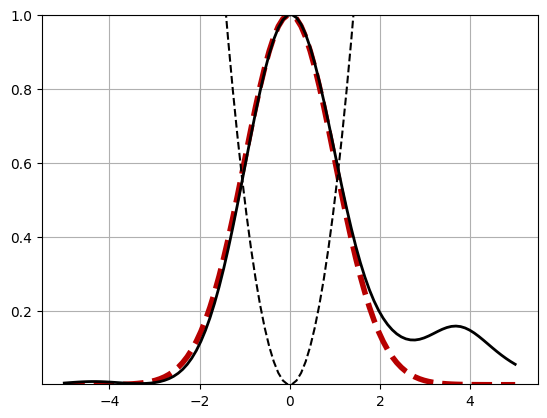

In [3]:
plotter = plotter1d(wf,domain,100,sol=ho1d_sol)#,save='./image/')
solver.run(75,loss = 'variance', plot = plotter, save='model.pth' )
